<h1><b>Infectious Diseases Data Analysis</b></h1>

<h2><b>Cleaning Process</b></h2>

<p>Following are the steps we followed for data analysis</p>

<p>1. Import the libraries</p>

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<p>2.Load the dataset.</p>

In [2]:
dataset=pd.read_csv('data/data.csv')

In [3]:
dataset.head(3)

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2


<p>Above we saw the column names and we might need to fix the spaces in the column names. In order to change that we
need to first know what are the actual names of the columns.</p>

<p>We do that using the pandas function <i>columns</i> to list all the columns</p>

In [4]:
dataset.columns

Index(['Indicator Category', 'Indicator', 'Year', 'Sex', 'Race/Ethnicity',
       'Value', 'Place', 'BCHC Requested Methodology', 'Source', 'Methods',
       'Notes', '90% Confidence Level - Low', '90% Confidence Level - High',
       '95% Confidence Level - Low', '95% Confidence Level - High'],
      dtype='object')

<p>Now we rename the columns</p>

In [5]:
dataset.rename(columns={'Indicator Category':'indicator_category','Indicator':'indicator','Year':'year', 'Sex':'sex', 'Race/Ethnicity':'race_ethnicity',
       'Value':'value', 'Place':'place', 'BCHC Requested Methodology':'bchc_req_meth', 'Source':'source', 'Methods':'methods',
       'Notes':'notes', '90% Confidence Level - Low':'90pc_con_lvl-low', '90% Confidence Level - High':'90pc_con_lvl-high',
       '95% Confidence Level - Low':'95pc_con_lvl-low','95% Confidence Level - High':'95pc_con_lvl-high'},inplace = True)

<p>3.Now we need to filter the data according to the indicator category. We use one of the values "Cancer".</p>

In [6]:
infectious_ds = dataset.loc[dataset["indicator_category"] == "Infectious Disease"]

<p>4.And then we remove empty columns and unnecessary columns</p>

In [7]:
infectious_ds.drop(['indicator_category','bchc_req_meth','source','methods','notes','90pc_con_lvl-low','90pc_con_lvl-high'],
                    axis = 1, inplace= True)

<p>5. Now we remove all the rows which has NaN or NA values</p>

In [8]:
infectious_ds.dropna(axis=0, how='any',inplace= True)

In [9]:
infectious_ds.to_csv("data/infectious_diseases.csv")

In [10]:
infectious_ds.head(3)

,indicator,year,sex,race_ethnicity,value,place,95pc_con_lvl-low,95pc_con_lvl-high
18078,Percent of Adults 65 and Over Who Received Pne...,2010,Both,All,59.9,"Charlotte, NC",51.3,68.5
18081,Percent of Adults 65 and Over Who Received Pne...,2010,Both,All,73.0,"Seattle, WA",65.0,80.0
18084,Percent of Adults 65 and Over Who Received Pne...,2010,Both,Asian/PI,72.0,"Seattle, WA",37.0,91.0


<h1>Analysis</h1>

First we'll see how many patients have been reported for cancer in respective years from 2010 to 2016. 

Following is the process to do the same

In [11]:
c_year_2010=infectious_ds[infectious_ds['year']==2010]
c_year_2010_count=c_year_2010['year'].count()


In [12]:
c_year_2010.shape

(92, 8)

In [13]:
c_year_2011=infectious_ds[infectious_ds['year']==2011]
c_year_2011_count=c_year_2011['year'].count()

c_year_2012=infectious_ds[infectious_ds['year']==2012]
c_year_2012_count=c_year_2012['year'].count()

c_year_2013=infectious_ds[infectious_ds['year']==2013]
c_year_2013_count=c_year_2013['year'].count()

c_year_2014=infectious_ds[infectious_ds['year']==2014]
c_year_2014_count=c_year_2014['year'].count()

c_year_2015=infectious_ds[infectious_ds['year']==2015]
c_year_2015_count=c_year_2015['year'].count()

c_year_2016=infectious_ds[infectious_ds['year']==2016]
c_year_2016_count=c_year_2016['year'].count()


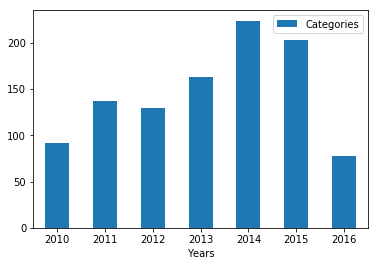

In [14]:
fig1 = pd.DataFrame({'Years':['2010', '2011', '2012','2013','2014','2015','2016'], 'Categories':[c_year_2010_count, c_year_2011_count,c_year_2012_count, c_year_2013_count,c_year_2014_count,c_year_2015_count,c_year_2016_count]})
ax = fig1.plot.bar(x='Years', rot=0)

<p>Now we calculate the number of cases for each type of cancer. In order to that we will group according to the 
indicator and take the count.</p>

In [15]:
sorted_infection = infectious_ds['indicator'].value_counts()
sorted_infection

Percent of Adults Who Received Seasonal Flu Shot                             354
Pneumonia and Influenza Mortality Rate (Age-Adjusted; Per 100,000 people)    264
Percent of Adults 65 and Over Who Received Pneumonia Vaccine                 213
Tuberculosis Incidence Rate (Per 100,000 people)                             136
Percent of Children Who Received Seasonal Flu Shot                            60
Name: indicator, dtype: int64

<p>And we plot a histogram to see.</p>

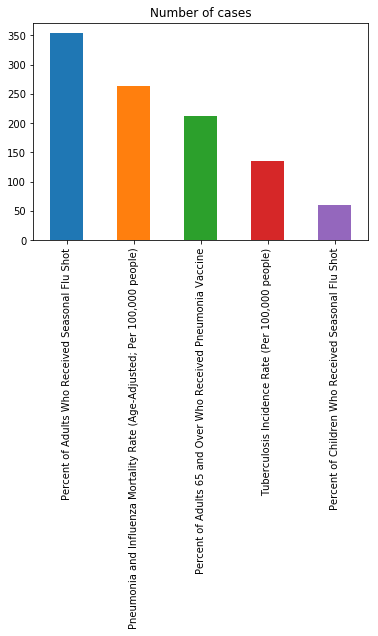

In [16]:
labels=list(infectious_ds.columns)
sorted_infection = infectious_ds['indicator'].value_counts().plot(title='Number of cases', kind='bar')
plt.show()
#label=list(group.columns)

Now we find out the distribution of cancer patients with respect to the race and ethnicity.

In [17]:
all=infectious_ds[infectious_ds['race_ethnicity']=="All"]
all_count=all.race_ethnicity.count()

asian=infectious_ds[infectious_ds['race_ethnicity']=="Asian/PI"]
asian_count=asian.race_ethnicity.count()

black=infectious_ds[infectious_ds['race_ethnicity']=="Black"]
black_count=black.race_ethnicity.count()

hispanic=infectious_ds[infectious_ds['race_ethnicity']=="Hispanic"]
hispanic_count=hispanic.race_ethnicity.count()

other=infectious_ds[infectious_ds['race_ethnicity']=="Other"]
other_count=other.race_ethnicity.count()

white=infectious_ds[infectious_ds['race_ethnicity']=="White"]
white_count=white.race_ethnicity.count()

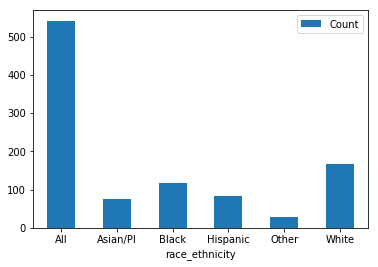

In [18]:
fig2 = pd.DataFrame({'race_ethnicity':['All', 'Asian/PI', 'Black','Hispanic','Other','White'], 
                     'Count':[all_count, asian_count,black_count, hispanic_count,other_count,white_count]})
ax = fig2.plot.bar(x='race_ethnicity', rot=0)

In [19]:
infectious_ds=infectious_ds.rename(columns={'95pc_con_lvl-low':'low','95pc_con_lvl-high':'high'})

In [20]:
ds=infectious_ds.drop(['indicator','year','sex','race_ethnicity'
                ,'place'],
                    axis = 1)

In [21]:
ds.head()

,value,low,high
18078,59.9,51.3,68.5
18081,73.0,65.0,80.0
18084,72.0,37.0,91.0
18087,54.2,34.5,74.4
18088,55.0,26.0,81.0


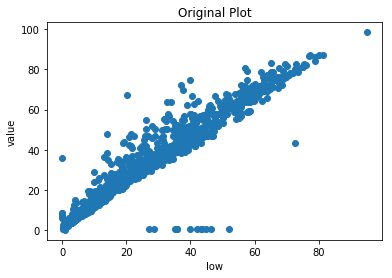

In [22]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('low')
ax1.set_ylabel('value')
ax1.set_title('Original Plot')
ax1.scatter('low', 'value', data = ds);

Linear Regression with high values

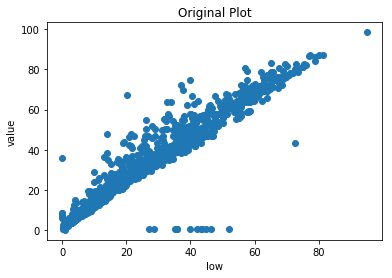

In [23]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('low')
ax1.set_ylabel('value')
ax1.set_title('Original Plot')
ax1.scatter('low', 'value', data = ds);

In [24]:
x_y = np.array(ds)
x, y = x_y[:,0], x_y[:,1]

# Reshaping
x, y = x.reshape(-1,1), y.reshape(-1, 1)

# Linear Regression Object 
lin_regression = LinearRegression()

# Fitting linear model to the data
lin_regression.fit(x,y)

# Get slope of fitted line
m = lin_regression.coef_

# Get y-Intercept of the Line
b = lin_regression.intercept_

# Get Predictions for original x values
# you can also get predictions for new data
predictions = lin_regression.predict(x)

# following slope intercept form 
print ("formula: y = {0}x + {1}".format(m, b) )

formula: y = [[0.83687858]]x + [-0.64247836]


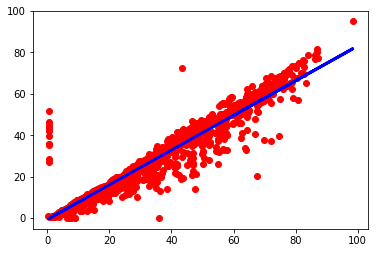

In [25]:
plt.scatter(x, y,  color='red')
plt.plot(x, predictions, color='blue',linewidth=3)
plt.show()